In [1]:
import matplotlib.pyplot as plt
from digraph import *
from dag_generator import *
import seaborn as sns
import time
import pandas as pd

import sys

sys.setrecursionlimit(100000)

In [2]:

sns.set_theme(style="whitegrid")

In [3]:
sns.reset_orig()

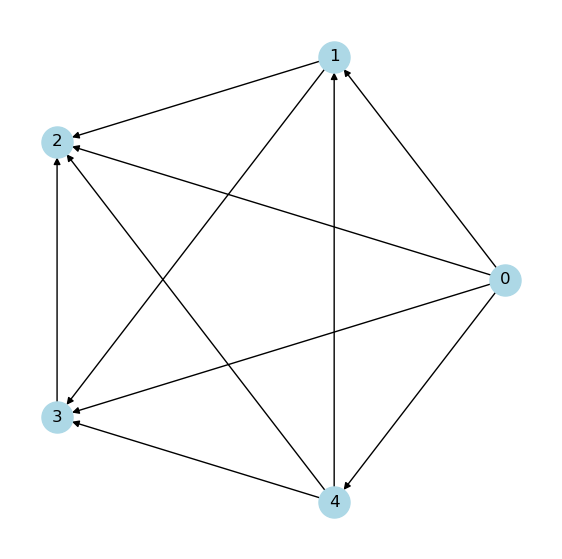

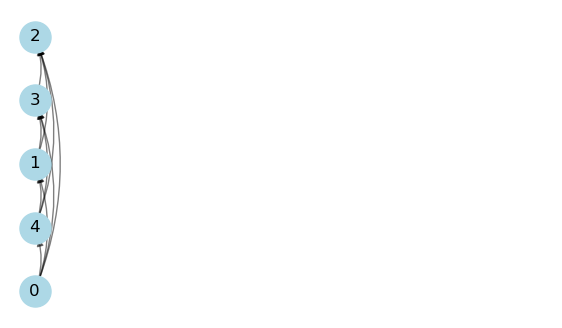

In [2]:
n = 5
g, _ = generate_dag(n, edge_probability=1, shuffle=True)
top = g.topological_order(0)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
g.plot(ax=ax)
plt.axis('off')

plt.savefig("tex/figs/dag_complete_{n}.pdf".format(n=n), bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(1, 1, figsize=(7,4))
g.plot_top(ax=ax, order=top)
plt.axis('off')
plt.savefig("tex/figs/dag_complete_top_{n}.pdf".format(n=n), bbox_inches='tight')
plt.show()




## Ordenação Topológica

In [5]:
tempos_de_execucao = []

for n in [10, 100, 1000, 10000]:
    g, _ = generate_dag(n, edge_probability=1)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao.append((n, end-start, "completo"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=6.198883056640625e-06
n=10, i=1, time=4.0531158447265625e-06
n=10, i=2, time=4.0531158447265625e-06
n=100, i=0, time=0.00012302398681640625
n=100, i=1, time=0.00011706352233886719
n=100, i=2, time=0.00011801719665527344
n=1000, i=0, time=0.010065078735351562
n=1000, i=1, time=0.009254932403564453
n=1000, i=2, time=0.009462833404541016
n=10000, i=0, time=1.0269379615783691
n=10000, i=1, time=0.9236910343170166
n=10000, i=2, time=1.1265380382537842


In [6]:
for n in [10, 100, 1000, 10000]:
    for i in range(3):
        g, _ = generate_dag(n, edge_probability=1/n)
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao.append((n, end-start, "m=1/n"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=0.00022292137145996094
n=10, i=1, time=3.814697265625e-06
n=10, i=2, time=2.1457672119140625e-06
n=100, i=0, time=2.5033950805664062e-05
n=100, i=1, time=2.288818359375e-05
n=100, i=2, time=2.193450927734375e-05
n=1000, i=0, time=0.00040078163146972656
n=1000, i=1, time=0.00026917457580566406
n=1000, i=2, time=0.0002529621124267578
n=10000, i=0, time=0.0037381649017333984
n=10000, i=1, time=0.0029549598693847656
n=10000, i=2, time=0.07463717460632324


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

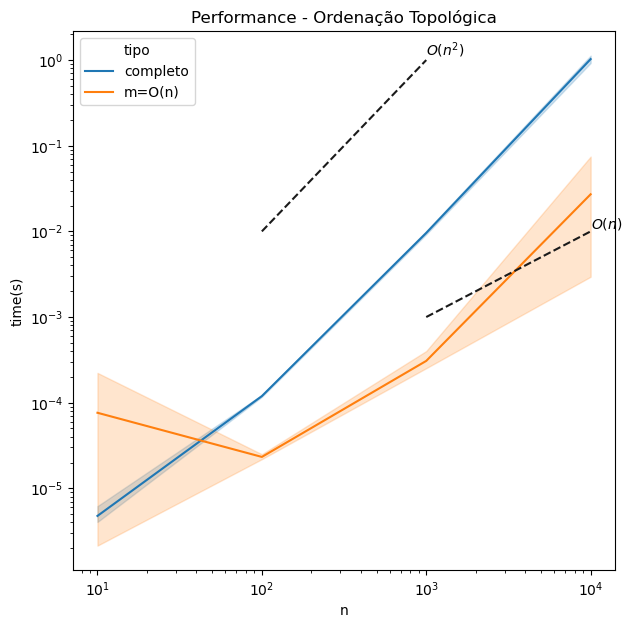

In [7]:
df = pd.DataFrame(tempos_de_execucao, columns=['n', 'time', "tipo"])
df.loc[df['tipo'] == "m=1/n", 'tipo'] = "m=O(n)"

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df, x='n', y='time', hue="tipo",ax=ax)

ax.plot([100, 1000], [1/100, 1], color='k', ls="--", label="$O(n^2)$")
ax.text(1000, 1, "$O(n^2)$", va="bottom", ha="left")

ax.plot([1000, 10000], [1/1000, 1/100], color='k', ls="--", label="$O(n)$")
ax.text(10000, 1/100, "$O(n)$", va="bottom", ha="left")

ax.set_ylabel("time(s)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Performance - Ordenação Topológica")

plt.savefig("tex/figs/topological_order_time.pdf", bbox_inches='tight')
plt.show()


# Kosajuru


In [8]:
def create_complete_graph(n, edge_probability=1):
    g = Digraph(n)
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < edge_probability:
                g.add_edge(i, j)
    return g

In [9]:
tempos_de_execucao_kosajuru = []

for n in [10, 100, 1000, 10000]:
    g = create_complete_graph(n)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao_kosajuru.append((n, end-start, "completo"))
        print(f"n={n}, i={i}, time={end-start}")

for n in [10, 100, 1000, 10000]:
    g = create_complete_graph(n, edge_probability=1/n)
    for i in range(3):
        # measure time of topological_order
        start = time.time()
        g.topological_order(0)
        end = time.time()
        tempos_de_execucao_kosajuru.append((n, end-start, "m = O(n)"))
        print(f"n={n}, i={i}, time={end-start}")

n=10, i=0, time=6.9141387939453125e-06
n=10, i=1, time=4.76837158203125e-06
n=10, i=2, time=4.0531158447265625e-06
n=100, i=0, time=0.00022602081298828125
n=100, i=1, time=0.00021600723266601562
n=100, i=2, time=0.00021719932556152344
n=1000, i=0, time=0.022794008255004883
n=1000, i=1, time=0.019682645797729492
n=1000, i=2, time=0.023242950439453125
n=10000, i=0, time=5.887539863586426
n=10000, i=1, time=3.602365255355835
n=10000, i=2, time=3.6022257804870605
n=10, i=0, time=1.9311904907226562e-05
n=10, i=1, time=2.1457672119140625e-06
n=10, i=2, time=2.86102294921875e-06
n=100, i=0, time=4.57763671875e-05
n=100, i=1, time=1.9073486328125e-05
n=100, i=2, time=1.8835067749023438e-05
n=1000, i=0, time=0.00021195411682128906
n=1000, i=1, time=0.00018310546875
n=1000, i=2, time=0.00018405914306640625
n=10000, i=0, time=0.0024001598358154297
n=10000, i=1, time=0.0032460689544677734
n=10000, i=2, time=0.0018970966339111328


/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mateusoliveira/Algoritmos/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

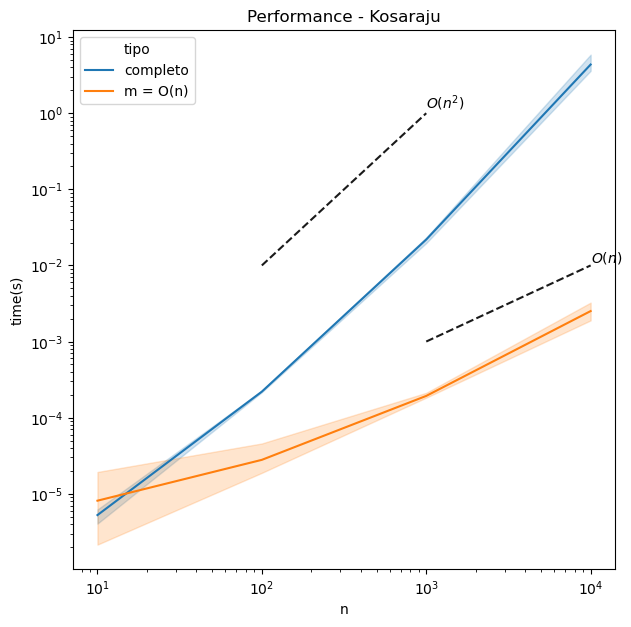

In [10]:
df = pd.DataFrame(tempos_de_execucao_kosajuru, columns=['n', 'time', "tipo"])
# Change m=1/n to m=O(n)
df.loc[df['tipo'] == "m=1/n", 'tipo'] = "m=O(n)"

fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.lineplot(data=df, x='n', y='time', hue="tipo",ax=ax)

ax.plot([100, 1000], [1/100, 1], color='k', ls="--", label="$O(n^2)$")
ax.text(1000, 1, "$O(n^2)$", va="bottom", ha="left")

ax.plot([1000, 10000], [1/1000, 1/100], color='k', ls="--", label="$O(n)$")
ax.text(10000, 1/100, "$O(n)$", va="bottom", ha="left")

ax.set_ylabel("time(s)")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Performance - Kosaraju")
plt.savefig("tex/figs/kosaraju_time.pdf", bbox_inches='tight')
plt.show()


In [11]:
# g = create_complete_graph(20, 0.1)

strong = g.strongly_connected_components()

fig, ax = plt.subplots(1, 1, figsize=(7,7))
# g.plot(ax=ax, layout=nx.spring_layout, strong_components=strong)
g.plot(ax=ax, layout=nx.kamada_kawai_layout)
plt.savefig("tex/figs/strong_components_0.pdf", bbox_inches='tight')
plt.grid('off')
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(7,7))
# g.plot(ax=ax, layout=nx.spring_layout, strong_components=strong)
g.plot(ax=ax, layout=nx.kamada_kawai_layout, strong_components=strong)
plt.savefig("tex/figs/strong_components_1.pdf", bbox_inches='tight')
plt.grid('off')
plt.show()
plt.close()

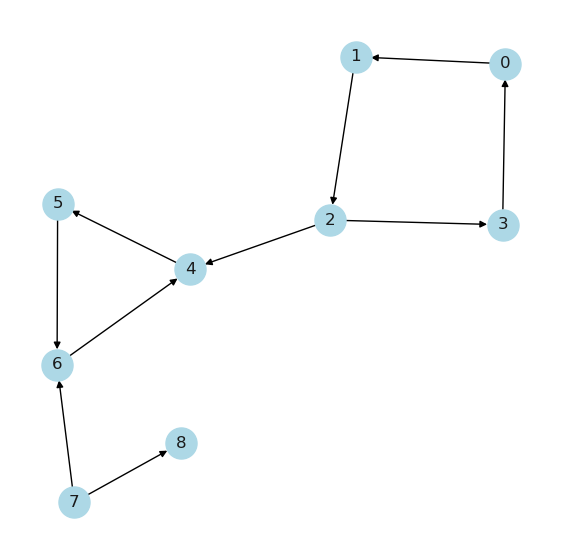

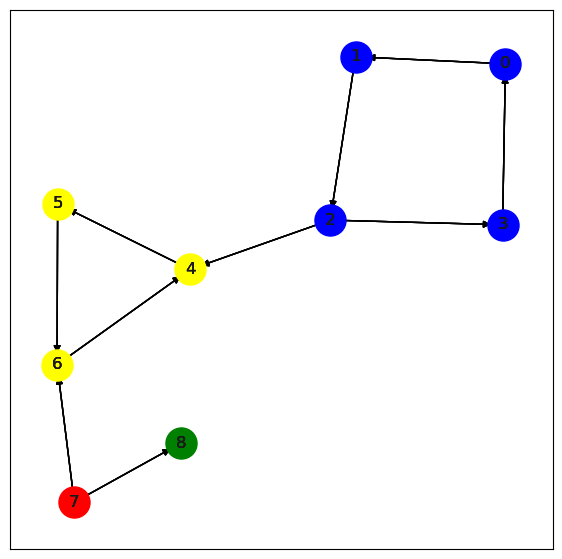

In [ ]:

g = Digraph(9)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 0)

g.add_edge(2, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 4)

g.add_edge(7, 6)
g.add_edge(7, 8)


strong = g.strongly_connected_components()
fig, ax = plt.subplots(1, 1, figsize=(7,7))
g.plot(ax=ax, layout=nx.kamada_kawai_layout)
plt.savefig("tex/figs/strongly_components_3.pdf", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(7,7))
g.plot(ax=ax, layout=nx.kamada_kawai_layout, strong_components=strong)
plt.savefig("tex/figs/strongly_components_4.pdf", bbox_inches='tight')
plt.show()
plt.close()